# PCA 
### Análisis de Componentes  Principales

El Análisis de Componentes Principales es un algoritmo utilizado para reducir la dimensionalidad de un conjunto de datos mientras se preserva la mayor cantidad posible de variación en los datos. El objetivo es transformar los datos a un nuevo sistema de coordenadas donde los ejes (llamados componentes principales) están ordenados de acuerdo con la cantidad de varianza que explican.


**Resumen del proceso:**

1. Estandarizar los datos.
2. Calcular la matriz de covarianza.
3. Obtener autovalores y autovectores.
4. Seleccionar los autovectores con los mayores autovalores.
5. Proyectar los datos originales sobre los nuevos componentes principales.


In [28]:
# Aplicaremos PCA  a Wine Dataset de scikit learn
from sklearn.datasets import load_wine

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#Para el PCA 
from sklearn.decomposition import PCA 

# Para Estandarizar Datos 
from sklearn.preprocessing import StandardScaler 

In [47]:
#Cargamos el dataset 
wine_data= load_wine()
wine_df= pd.DataFrame(data=wine_data.data, columns= wine_data.feature_names)
print("----------------------------------------------------------------------------------------------------------")
print("Resumen Estadistico del dataframe")
print(wine_df.describe())
print("----------------------------------------------------------------------------------------------------------\n\n")

#Estandarización de Datos 
scaler= StandardScaler()
wine_scaled= scaler.fit_transform(wine_df)
print("Dataset estandarizado \n\n", wine_scaled) #Ahora es un arreglo de numpy 


----------------------------------------------------------------------------------------------------------
Resumen Estadistico del dataframe
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    

In [41]:
#Aplicar PCA 
pca= PCA(n_components= 3) #cargamos el modelo con 2 dimensiones 
wine_pca= pca.fit_transform(wine_scaled) #aplicamos pca
pca_df= pd.DataFrame(data= wine_pca, columns=['PC1', 'PC2','PC3']) #transformamos a dataframe
# Añadir la clase de vino para análisis
pca_df['target'] = wine_data.target
pca_df.head()

,PC1,PC2,PC3,target
0,3.316751,1.443463,-0.165739,0
1,2.209465,-0.333393,-2.026457,0
2,2.516740,1.031151,0.982819,0
3,3.757066,2.756372,-0.176192,0
4,1.008908,0.869831,2.026688,0


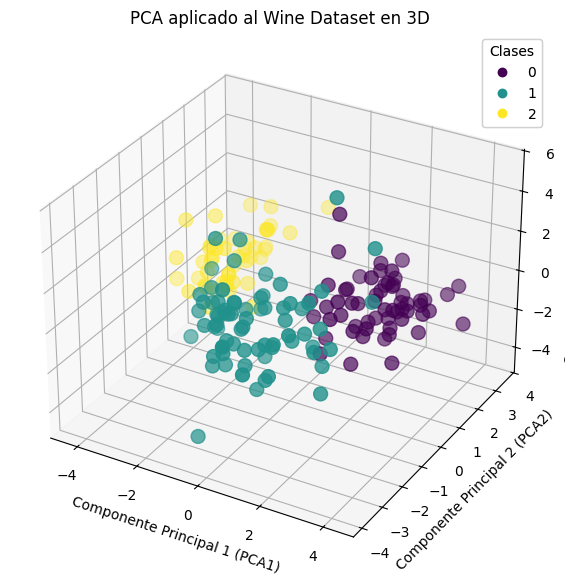

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y un subplot 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico 3D
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['target'], cmap='viridis', s=100)

# Etiquetas y título
ax.set_xlabel('Componente Principal 1 (PCA1)')
ax.set_ylabel('Componente Principal 2 (PCA2)')
ax.set_zlabel('Componente Principal 3 (PCA3)')
ax.set_title('PCA aplicado al Wine Dataset en 3D')

# Mostrar leyenda de colores
legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
ax.add_artist(legend1)

# Mostrar gráfico
plt.show()


Varianza explicada por los componentes principales: [0.36198848 0.1920749  0.11123631]
Varianza Acumulada explicada por los componentes principales: 0.6652996889318523


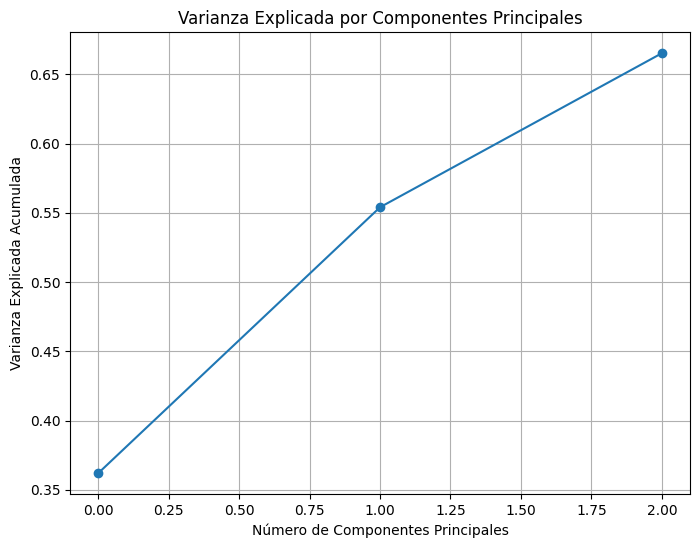

In [51]:
# Porcentaje de varianza explicada por cada componente principal

explained_variance = pca.explained_variance_ratio_

print(f'Varianza explicada por los componentes principales: {explained_variance}')

explained_variance_sum = pca.explained_variance_ratio_.sum()

print(f'Varianza Acumulada explicada por los componentes principales: {explained_variance_sum}')


plt.figure(figsize=(8,6))

# Graficar la varianza acumulada con los componentes principales
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')

# Etiquetas y título
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)

# Mostrar gráfico
plt.show()



## Contribución de clases por componente

El PCA descompone la matriz de datos originales en una combinación lineal de características, donde cada componente principal es una nueva variable que maximiza la varianza de los datos proyectados sobre ese eje.

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2  0.483652    0.224931  0.316069          -0.010591   0.299634   
PC3 -0.207383    0.089013  0.626224           0.612080   0.130757   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
PC1       0.394661    0.422934             -0.298533         0.313429   
PC2       0.065040   -0.003360              0.028779         0.039302   
PC3       0.146179    0.150682              0.170368         0.149454   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
PC1        -0.088617  0.296715                      0.376167  0.286752  
PC2         0.529996 -0.279235                     -0.164496  0.364903  
PC3        -0.137306  0.085222                      0.166005 -0.126746  


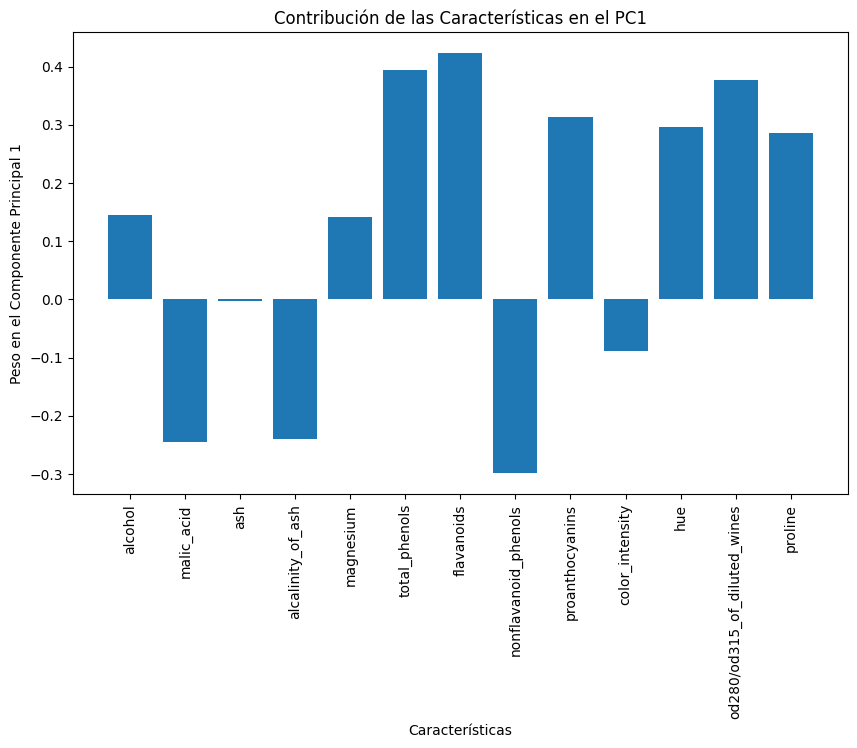

In [55]:
# Obtener las cargas de las características en los componentes principales
components = pd.DataFrame(pca.components_, columns=wine_data.feature_names, index=['PC1', 'PC2','PC3'])
print(components)

# Visualización de las contribuciones de las características en el primer componente principal
plt.figure(figsize=(10,6))
plt.bar(components.columns, components.loc['PC1'])
plt.xlabel('Características')
plt.ylabel('Peso en el Componente Principal 1')
plt.title('Contribución de las Características en el PC1')
plt.xticks(rotation=90)
plt.show()




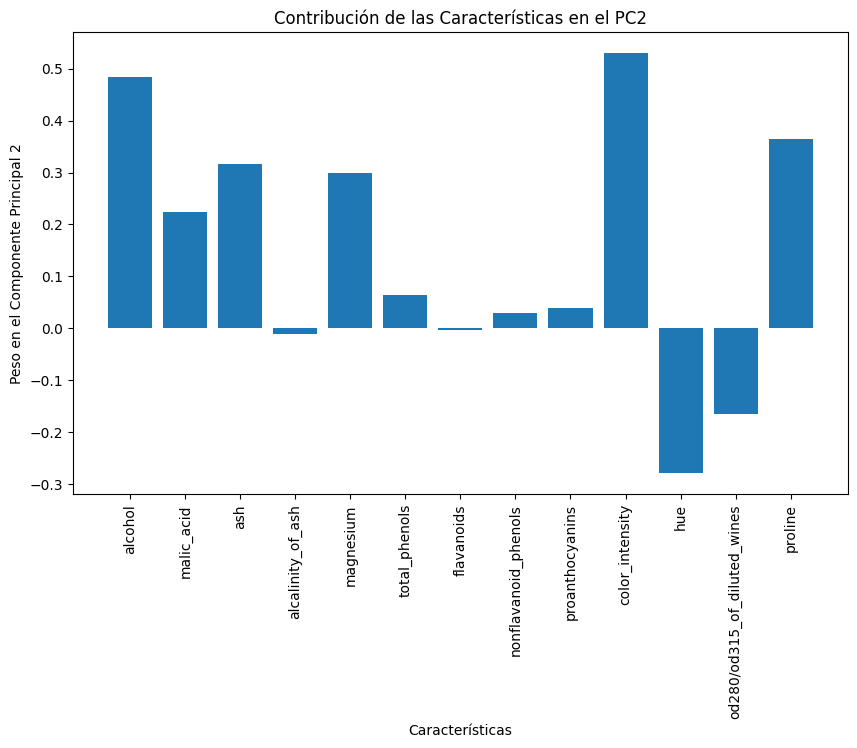

In [56]:
# Visualización de las contribuciones de las características en el segundo componente principal
plt.figure(figsize=(10,6))
plt.bar(components.columns, components.loc['PC2'])
plt.xlabel('Características')
plt.ylabel('Peso en el Componente Principal 2')
plt.title('Contribución de las Características en el PC2')
plt.xticks(rotation=90)
plt.show()

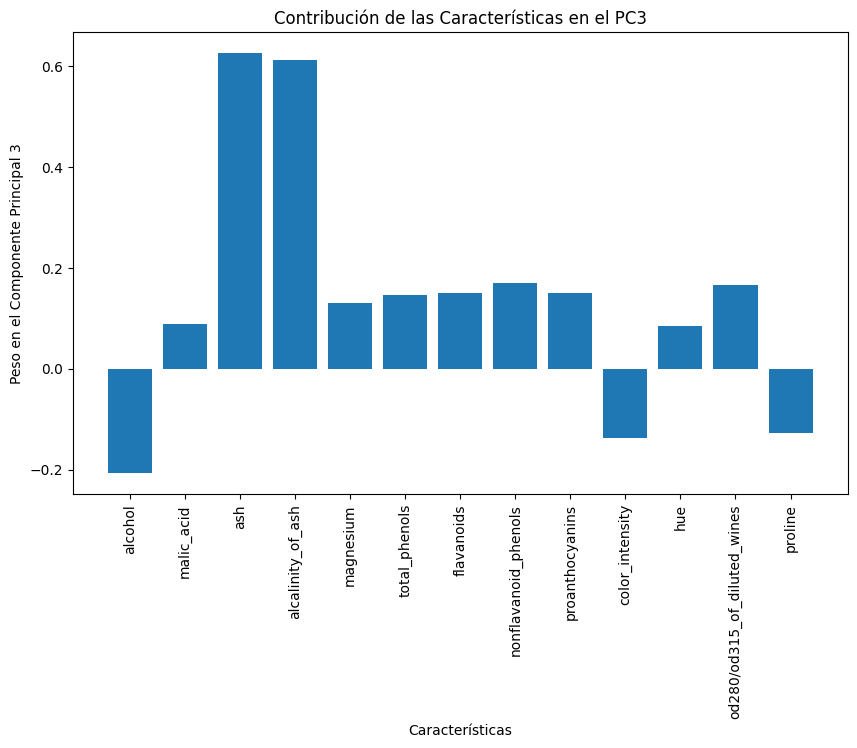

In [58]:
# Visualización de las contribuciones de las características en el tercer componente principal
plt.figure(figsize=(10,6))
plt.bar(components.columns, components.loc['PC3'])
plt.xlabel('Características')
plt.ylabel('Peso en el Componente Principal 3')
plt.title('Contribución de las Características en el PC3')
plt.xticks(rotation=90)
plt.show()

